In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from io import StringIO
import io
from collections import namedtuple
from datetime import datetime,timedelta
import sys
import json
import ast
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import seaborn as sns

   weekstart    weekend       Spend     Daily
0  01-Jan-18  07-Jan-18  34235.9220  4890.846
1  08-Jan-18  14-Jan-18  37359.6048  5337.086
2  15-Jan-18  21-Jan-18  38916.1164  5559.445
3  22-Jan-18  28-Jan-18  36903.8628  5271.980
Empty DataFrame
Columns: [Date, Amount]
Index: []
         Date    Amount
1  2018-01-01  4890.846
2  2018-01-02  4890.846
3  2018-01-03  4890.846
4  2018-01-04  4890.846
5  2018-01-05  4890.846
6  2018-01-06  4890.846
7  2018-01-07  4890.846
8  2018-01-08  5337.086
9  2018-01-09  5337.086
10 2018-01-10  5337.086
11 2018-01-11  5337.086
12 2018-01-12  5337.086
13 2018-01-13  5337.086
14 2018-01-14  5337.086
15 2018-01-15  5559.445
16 2018-01-16  5559.445
17 2018-01-17  5559.445
18 2018-01-18  5559.445
19 2018-01-19  5559.445
20 2018-01-20  5559.445
21 2018-01-21  5559.445
22 2018-01-22  5271.980
23 2018-01-23  5271.980
24 2018-01-24  5271.980
25 2018-01-25  5271.980
26 2018-01-26  5271.980
27 2018-01-27  5271.980
28 2018-01-28  5271.980


C:\Users\DNISHI~1\AppData\Local\Temp/ipykernel_7436/3259226528.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only
  df2.set_index(pd.Index(index),'index',inplace=True)


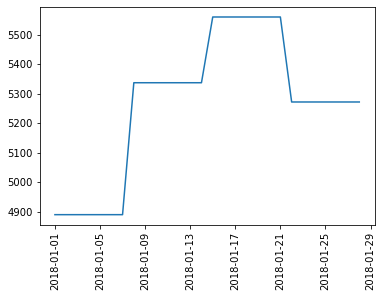

In [2]:
df = pd.DataFrame({
    'weekstart':['01-Jan-18','08-Jan-18','15-Jan-18','22-Jan-18'],
    'weekend':['07-Jan-18','14-Jan-18','21-Jan-18','28-Jan-18'],
    'Spend':[34235.922,37359.6048,38916.1164,36903.8628],
    'Daily':[4890.846,5337.086,5559.445,5271.98],
})
print(df)

df2=pd.DataFrame(columns=['Date','Amount'])
df2['Date']=pd.to_datetime(df2['Date'])
#df2.reset_index(level=0,inplace=True)
print(df2)

for key,value in df.iterrows():
    #print(key,value)
    amount=value['Daily']
    for date in pd.date_range(value['weekstart'], value['weekend']):
        #print(date)
        df2=df2.append({"Date":date,"Amount":amount},ignore_index=True)

index=range(1,len(df2)+1) 

df2.set_index(pd.Index(index),'index',inplace=True)
print(df2)

plt.plot(df2['Date'],df2['Amount'])
plt.xticks(rotation=90)
plt.show()

In [3]:
category = ['Car','Car','Car','Car','Truck','Truck','Truck']
name = ['Camry','Camry','Camry','Camry','Tacoma','Tundra','Tundra']
year = ['2007','2007','2008','2009','2010','2010','2011']
vals = [0.1,0.5,0.2,0.9,0.8,0.4,0.9]
df = pd.DataFrame({'Category': category,
                   'Name': name,
                   'Year': year,
                   'Vals': vals})

print(df.query("(Category=='Car' and Name=='Camry' and Year=='2007') or (Category=='Truck' and Name=='Tundra' and Year=='2010')"))

  Category    Name  Year  Vals
0      Car   Camry  2007   0.1
1      Car   Camry  2007   0.5
5    Truck  Tundra  2010   0.4


In [4]:
txt="firstname lastname (1937-2015)"
pattern=r'(\d{4}\-\d{4})+'

matches=re.findall(pattern,txt)
print(matches[0].split('-')[1])

2015


In [5]:
data = [['FRUIT', 'FRU', 100],['A.GRAPE','A.GRA', 50],['A.APPLE','A.APP', 50],
        ['VEGETABLE', 'VEG', 75],['A.TOMATO','A.TOM', 25],['A.CABBAGE','A.CAB', 25],['A.CARROT','A.CAR', 25]]
df = pd.DataFrame(data, columns = ['name', 'abbrevation', 'value'])

df['Category']=df['name'].apply(lambda x: x if x.isalpha() else None)
df.ffill(inplace=True)
print(df)

        name abbrevation  value   Category
0      FRUIT         FRU    100      FRUIT
1    A.GRAPE       A.GRA     50      FRUIT
2    A.APPLE       A.APP     50      FRUIT
3  VEGETABLE         VEG     75  VEGETABLE
4   A.TOMATO       A.TOM     25  VEGETABLE
5  A.CABBAGE       A.CAB     25  VEGETABLE
6   A.CARROT       A.CAR     25  VEGETABLE


In [6]:
print("find the floating point number")
txt="200.20356AVAX"
pattern=r"\d+\.*\d*"
print(re.findall(pattern,txt))

find the floating point number
['200.20356']


In [7]:
print("create a list of words and special characters")

txt="""var a = "hello world" 
print("hello", "a")"""


txt=re.sub('\n','',txt)        
results=[]
buffer=[]
for char in txt:
    if char.isalpha()==False:
        if char!=' ':
            results.append(char)
        if len(buffer)>0:
            results.append("".join(buffer))
        buffer.clear()
    else:
        buffer.append(char)
        
print(results)


create a list of words and special characters
['var', 'a', '=', '"', 'hello', '"', 'world', '(', 'print', '"', '"', 'hello', ',', '"', '"', 'a', ')']


In [8]:
print("convert to the year and quarter")
data='''yrmo
202101
202102
202103
202104
202105
202106
202109
202111'''
df = pd.read_csv(io.StringIO(data), sep=' \s+', engine='python')
month_year=pd.to_datetime(df['yrmo'],format="%Y%m")
df['DIST_PERIOD'] = month_year.dt.to_period("Q").dt.strftime('%Y0%q')
print(df)

convert to the year and quarter
     yrmo DIST_PERIOD
0  202101      202101
1  202102      202101
2  202103      202101
3  202104      202102
4  202105      202102
5  202106      202102
6  202109      202103
7  202111      202104


In [9]:
print("find words with no space following or a single space between words")
list_of_strings = ["apple", "orange ca", "pear  sa", "banana    sth"]

my_list=[]
def find_phrase(list_of_strings):
    for string in list_of_strings:
        matches=re.findall(r"(\w+)( \w+)*", string)
        if len(matches)>0:
            my_list.append("".join([matches[0][0],matches[0][1]]))
    return my_list
            
print(find_phrase(list_of_strings))

find words with no space following or a single space between words
['apple', 'orange ca', 'pear', 'banana']


In [10]:
txt="a b c private d e f g protected h i j k public l m n o p"

pattern=r"(public)|(private)|(protected)"

matches=re.findall(pattern,txt)
for match in matches:
    print(match)

('', 'private', '')
('', '', 'protected')
('public', '', '')


In [11]:
print("Look behind for the phrase MFG:")
print("look behind is not including in the grouping output")
txt="MFG: acme, something else, MFG: initech"
pattern=r"(?<=MFG\:)\s+\w+"
matches=re.findall(pattern,txt)
for match in matches:
    print(match)

Look behind for the phrase MFG:
look behind is not including in the grouping output
 acme
 initech


In [12]:
print("words without the character e")
strs = ['america','e', 'E', 'world','hello','welcome','board','know']
pattern="(?:(?!e)[a-z])+"
for item in strs:
    print(item,re.search(pattern,item))


words without the character e
america <re.Match object; span=(0, 2), match='am'>
e None
E None
world <re.Match object; span=(0, 5), match='world'>
hello <re.Match object; span=(0, 1), match='h'>
welcome <re.Match object; span=(0, 1), match='w'>
board <re.Match object; span=(0, 5), match='board'>
know <re.Match object; span=(0, 4), match='know'>


In [13]:
print("convert a dataframe  to  a json structure")
data="""user_id,cat_id,prod_id,score,pref_prod
    29762,9,3115,1.000000,335.0
    29762,58,1335,1.000000,335.0
    234894,58,1335,1.000000,335.0
    413276,43,1388,1.000000,335.0
    413276,58,335,1.000000,335.0
    413276,73,26,1.000000,335.0
    9280593,9,137,1.000000,335.0
    9280593,58,1335,1.000000,335.0
    9280593,74,160,1.000000,335.0
    4554542,66,1612,0.166667,197.0
    4554542,66,1406,0.166767,197.0
    4554542,66,2021,1.000000,197.0"""

df = pd.read_csv(io.StringIO(data), sep=',')
print(df)


Record=namedtuple('Generic',['user_id','cat_id','prod_id','score','pref_prod'])

def map_to_record(row):
    return Record(row.user_id, row.cat_id, row.prod_id,row.score,row.pref_prod)

my_list = list(map(map_to_record, df.itertuples()))

def named_tuple_to_json(named_tuple):
    """
    convert a named tuple to a json tree structure
    """
    json_string="records:["
    for record in named_tuple:
        json_string+="{"
        json_string+="'user_id': {},'cat_id': {},'prod_id': {},'score': {},'pref_prod': {},".format(
        record.user_id,record.cat_id,record.prod_id,record.score,record.pref_prod)
        json_string+="},"
    json_string+="]"
    return json_string

# convert the list of named tuples to a json tree structure
json_tree = named_tuple_to_json(my_list)
print(json_tree)

convert a dataframe  to  a json structure
    user_id  cat_id  prod_id     score  pref_prod
0     29762       9     3115  1.000000      335.0
1     29762      58     1335  1.000000      335.0
2    234894      58     1335  1.000000      335.0
3    413276      43     1388  1.000000      335.0
4    413276      58      335  1.000000      335.0
5    413276      73       26  1.000000      335.0
6   9280593       9      137  1.000000      335.0
7   9280593      58     1335  1.000000      335.0
8   9280593      74      160  1.000000      335.0
9   4554542      66     1612  0.166667      197.0
10  4554542      66     1406  0.166767      197.0
11  4554542      66     2021  1.000000      197.0
records:[{'user_id': 29762,'cat_id': 9,'prod_id': 3115,'score': 1.0,'pref_prod': 335.0,},{'user_id': 29762,'cat_id': 58,'prod_id': 1335,'score': 1.0,'pref_prod': 335.0,},{'user_id': 234894,'cat_id': 58,'prod_id': 1335,'score': 1.0,'pref_prod': 335.0,},{'user_id': 413276,'cat_id': 43,'prod_id': 1388,'score':

In [14]:
print("an count occurrence occurs when the minutes of one day overlay another for a person")
#1;SMITH, JOHN;10/20/20 8:00 AM;10/20/20 9:30 AM
#2;SMITH, JOHN;10/20/20 9:20 AM;10/20/20 10:30 AM
#3;SMITH, JOHN;10/20/20 10:20 AM;10/20/20 11:00 AM
#4;COOPER, ALLEN;10/20/20 1:00 PM;10/20/20 2:15 PM
#5;PEREZ, HILL;10/20/20 3:15 PM;10/20/20 4:00 PM
#6;SMITH, JOHN;10/4/21 8:00 AM;10/20/21 9:30 AM
#7;SMITH, JOHN;10/4/21 9:20 AM;10/20/21 10:30 AM
#8;SMITH, JOHN;10/4/21 11:20 AM;10/20/21 12:00 PM
#9;SMITH, JOHN ;10/4/21 1:00 PM;10/20/21 2:15 PM
#10;SMITH, JOHN;10/4/21 3:15 PM;10/20/21 4:00 PM

df = pd.read_csv(io.StringIO("""
Record ID;Record Name;Record Start;Record End
1;SMITH, JOHN;10/20/20 8:00 AM;10/20/20 9:30 AM
2;SMITH, JOHN;10/20/20 9:20 AM;10/20/20 10:30 AM
3;SMITH, JOHN;10/20/20 10:20 AM;10/20/20 11:00 AM
4;COOPER, ALLEN;10/20/20 1:00 PM;10/20/20 2:15 PM
5;PEREZ, HILL;10/20/20 3:15 PM;10/20/20 4:00 PM
6;SMITH, JOHN;10/4/21 8:00 AM;10/20/21 9:30 AM
7;SMITH, JOHN;10/4/21 9:20 AM;10/20/21 10:30 AM
8;SMITH, JOHN;10/4/21 11:20 AM;10/20/21 12:00 PM
9;SMITH, JOHN ;10/4/21 1:00 PM;10/20/21 2:15 PM
10;SMITH, JOHN;10/4/21 3:15 PM;10/20/21 4:00 PM
"""),sep=';')

df['Record Start']=pd.to_datetime(df['Record Start'])
df['Record End']=pd.to_datetime(df['Record End'])

def create_datetime(date,hour,minute,second):
    month=date.month
    day=date.day
    year=date.year
    #month = int(txt.split("/")[0])
    #day = int(txt.split("/")[1])
    #year = int("20"+txt.split("/")[2].split(" ")[0])
    # datetime(year, month, day, hour, minute, second, microsecond)
    return datetime(year=year,month=month,day=day,hour=hour,minute=minute,second=second,microsecond=0)

def get_minutes(row):
    #start = datetime.strptime(row['Record Start'], '%m/%d/%y %H:%M %p')
    start=row['Record Start']
    start_end_of_day=create_datetime(row['Record Start'],23,59,59)
   
    #end = datetime.strptime(row['Record End'], '%m/%d/%y %H:%M %p')
    end = row['Record End']
    end_beginning_of_day=create_datetime(row['Record End'], 0,0,0)
    
    results=[start + timedelta(minutes=x) for x in range(0, round((end-start).total_seconds()//60)+1)]
      
    #for item in results:
    #    print(item)
    #sys.exit()
    return results

df['minutes'] = df.apply(get_minutes, axis=1)

def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))

prev_row=None
for index,row in df.iterrows():
    if index==0:
        df.loc[index,'Count']=1
    else:
        prev_row=df.iloc[index-1]
        
    if not prev_row is None:
        if prev_row['Record Name']==row['Record Name']:
            count=prev_row['Count']
            lst1=row['minutes']
            lst2=prev_row['minutes']
            if len(intersection(lst1,lst2))>0:
                df.loc[index,'Count']=count+1
            else:
                df.loc[index,'Count']=1
        else:
            df.loc[index,'Count']=1
        
#print(df[df['Count']>=3])   
print(df[['Record ID','Record Name', 'Record Start','Record End','minutes','Count']])
        


an count occurrence occurs when the minutes of one day overlay another for a person
   Record ID    Record Name        Record Start          Record End  \
0          1    SMITH, JOHN 2020-10-20 08:00:00 2020-10-20 09:30:00   
1          2    SMITH, JOHN 2020-10-20 09:20:00 2020-10-20 10:30:00   
2          3    SMITH, JOHN 2020-10-20 10:20:00 2020-10-20 11:00:00   
3          4  COOPER, ALLEN 2020-10-20 13:00:00 2020-10-20 14:15:00   
4          5    PEREZ, HILL 2020-10-20 15:15:00 2020-10-20 16:00:00   
5          6    SMITH, JOHN 2021-10-04 08:00:00 2021-10-20 09:30:00   
6          7    SMITH, JOHN 2021-10-04 09:20:00 2021-10-20 10:30:00   
7          8    SMITH, JOHN 2021-10-04 11:20:00 2021-10-20 12:00:00   
8          9   SMITH, JOHN  2021-10-04 13:00:00 2021-10-20 14:15:00   
9         10    SMITH, JOHN 2021-10-04 15:15:00 2021-10-20 16:00:00   

                                             minutes  Count  
0  [2020-10-20 08:00:00, 2020-10-20 08:01:00, 202...    1.0  
1  [2020-1

In [15]:
pattern=r'(\d{1,2})\/(\d{1,2})\/(\d{4}).*?'

txt="10/4/21 8:00 AM"
month = txt.split("/")[0]
day = txt.split("/")[1]
year = txt.split("/")[2].split(" ")[0]
print(month,day,year)


10 4 21


In [16]:
print("create dictionaries from key and value pairs")


df = pd.DataFrame({"id":["a1", "b4", "c5", "k2"], 
                   "value":["0:0,1:10,2:0,3:0,4:7","0:5,1:0,2:0,3:0,4:1","0:0,1:3,2:2,3:0,4:0","0:0,1:2,2:0,3:4,4:0"]})

print(df)


for key,row in df.iterrows():
    results=[]
    {results.append({int(k),int(v)}) if int(k)!=0 and int(v)!=0 else None for k,v in (x.split(':') for x in row['value'].split(','))}
    print(results)
    df.loc[key,'value']=results
    
print(df)

create dictionaries from key and value pairs
   id                 value
0  a1  0:0,1:10,2:0,3:0,4:7
1  b4   0:5,1:0,2:0,3:0,4:1
2  c5   0:0,1:3,2:2,3:0,4:0
3  k2   0:0,1:2,2:0,3:4,4:0
[{1, 10}, {4, 7}]
[{1, 4}]
[{1, 3}, {2}]
[{1, 2}, {3, 4}]
   id              value
0  a1  [{1, 10}, {4, 7}]
1  b4           [{1, 4}]
2  c5      [{1, 3}, {2}]
3  k2   [{1, 2}, {3, 4}]


calculate the accumulative change for 1000 dollars
   VIXCLS  Percent_Change   Cumulative                                 2item
0   17.24        0.000000  1000.000000  AxesSubplot(0.125,0.125;0.775x0.755)
1   18.19        0.055104  1055.104408  AxesSubplot(0.125,0.125;0.775x0.755)
2   19.22        0.056625  1114.849188  AxesSubplot(0.125,0.125;0.775x0.755)
3   20.11        0.046306  1166.473318  AxesSubplot(0.125,0.125;0.775x0.755)
4   20.26        0.007459  1175.174014  AxesSubplot(0.125,0.125;0.775x0.755)
5   22.20        0.095755  1287.703016  AxesSubplot(0.125,0.125;0.775x0.755)
6   22.44        0.010811  1301.624130  AxesSubplot(0.125,0.125;0.775x0.755)
7   20.05       -0.106506  1162.993039  AxesSubplot(0.125,0.125;0.775x0.755)


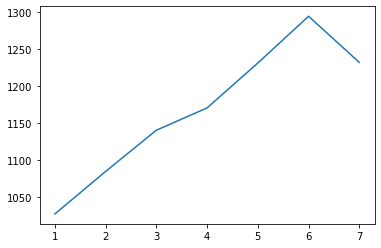

In [17]:
print("calculate the accumulative change for 1000 dollars")

data=[17.24,18.19,19.22,20.11,20.26,22.2,22.44,20.05]
df=pd.DataFrame({'VIXCLS':data})
df['Percent_Change']=df['VIXCLS'].pct_change().fillna(0)

amount=1000

returns_plus_one=df['Percent_Change']+1
cumulative_return = returns_plus_one.cumprod()

df['Cumulative']=cumulative_return.mul(amount)

df['2item']=df['Cumulative'].rolling(window=2).mean().plot()

print(df)

Index(['1-01', '1-02', '1-03', '1-04', '1-05', '1-06', '1-07', '1-08', '1-09',
       '1-10', '1-11', '1-12', '2-01', '2-02', '2-03', '2-04', '2-05', '2-06',
       '2-07', '2-08', '2-09', '2-10', '2-11', '2-12', '3-01', '3-02', '3-03',
       '3-04', '3-05', '3-06', '3-07', '3-08', '3-09', '3-10', '3-11', '3-12'],
      dtype='object', name='Month')


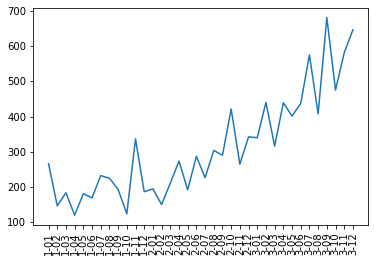

In [18]:
df=pd.read_csv('shampoo.csv',parse_dates=['Month'])
#print(df.columns)
pivot=df.pivot_table(index=['Month'],values=['Sales'],aggfunc=np.sum)
print(pivot.index)
plt.plot(pivot.index,pivot.values)
plt.xticks(rotation=90)
plt.show()

In [19]:
print("find the time difference by grouping by id")
data = {'id': [2, 2, 2, 4, 4], 'time': ['22:17:46', '22:19:02', '22:06:00', '22:18:06', '22:18:06']}
df=pd.DataFrame.from_dict(data)

df['time'] = pd.to_datetime(df['time'])
df['time_diff'] = df.groupby('id')['time'].transform(lambda x: x.max() - x.min())

#grouped=df.groupby('id')['time'].agg(['min', 'max'])
#for item in grouped.items():
#    print(item['min'],item['max'])

print(df)

   id                time       time_diff
0   2 2021-12-01 22:17:46 0 days 00:13:02
1   2 2021-12-01 22:19:02 0 days 00:13:02
2   2 2021-12-01 22:06:00 0 days 00:13:02
3   4 2021-12-01 22:18:06 0 days 00:00:00
4   4 2021-12-01 22:18:06 0 days 00:00:00


In [20]:
print('include only rows landing on wednesday ')

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

indices = pd.date_range(start='feb 01 2020', end='nov 30 2020', freq='D')
sr=pd.Series(index=indices, data=np.random.randn(indices.shape[0]))
print(sr[sr.index.dayofweek == 2])

include only rows landing on wednesday 
2020-02-05   -2.109636
2020-02-12    0.798849
2020-02-19   -1.301143
2020-02-26   -0.888312
2020-03-04    0.026897
2020-03-11   -0.699381
2020-03-18   -0.807758
2020-03-25   -2.109907
2020-04-01    1.338883
2020-04-08    1.518726
2020-04-15    0.069521
2020-04-22   -1.653354
2020-04-29   -1.472092
2020-05-06   -0.699929
2020-05-13    0.719593
2020-05-20    0.661622
2020-05-27    0.926848
2020-06-03   -0.174931
2020-06-10    1.193409
2020-06-17    0.431758
2020-06-24   -0.433327
2020-07-01    0.427574
2020-07-08   -0.877793
2020-07-15   -0.787651
2020-07-22    0.664611
2020-07-29   -1.866715
2020-08-05   -0.992249
2020-08-12   -0.119305
2020-08-19   -0.419115
2020-08-26   -1.239457
2020-09-02    0.683827
2020-09-09   -0.963961
2020-09-16   -0.070694
2020-09-23   -0.576280
2020-09-30    0.490050
2020-10-07   -0.101506
2020-10-14    0.246155
2020-10-21    1.172024
2020-10-28   -0.593341
2020-11-04    0.821322
2020-11-11   -0.668893
2020-11-18    0.0

In [21]:
txt="""scanned_date,total       
2021-11-01,0
2021-11-02,0
2021-11-03,0
2021-11-04,0
2021-11-05,0
"""

#https://www.py4u.net/discuss/17020

df = pd.read_csv(io.StringIO(txt),sep=',',parse_dates=['scanned_date'])
print(list(map(lambda tuple_obj: 
               (
                   pd.to_datetime(tuple_obj[1],'%M/%d/%Y')
                  #str(tuple_obj[1].astype("datetime64[M]").astype(int)% 12 + 1)
                  # + "\\" + str(tuple_obj[1].astype(object).day)
                  # + "\\" + str(tuple_obj[1].astype("datetime64[Y]"))
                 ,
                tuple_obj[2]),
               df.to_records())))

[(Timestamp('2021-11-01 00:00:00'), 0), (Timestamp('2021-11-02 00:00:00'), 0), (Timestamp('2021-11-03 00:00:00'), 0), (Timestamp('2021-11-04 00:00:00'), 0), (Timestamp('2021-11-05 00:00:00'), 0)]


In [2]:
txt=""" ColA,ColB,ColC,ColD
B,2021-10-24,2,NA
B,2021-10-25,4,2
B,2021-10-26,500,496
B,2021-10-27,100,-400
B,2021-10-28,55,-45
B,2021-10-29,600,545
B,2021-10-30,8,-592 
B,2021-10-31,4300,4292 
B,2021-11-01,200,-4100
H,2021-10-24,600,NA
H,2021-10-25,0000,9400 
H,2021-10-26,100,-9900 
H,2021-10-27,300,200
H,2021-10-28,2,-292
H,2021-10-29,8,6
H,2021-10-30,600,592
H,2021-10-31,600,0
H,2021-11-01,650,50"""

df = pd.read_csv(io.StringIO(txt),sep=',',parse_dates=['ColB'])
df['ColD_2']=df['ColD'].shift(2)
df['ColD_3']=df['ColD'].shift(3)
df['ColD_2_check']=np.where(df['ColD_2']>200,1,0)
df['ColD_3_check']=np.where(df['ColD_3']>200,1,0)
df['newCol']=df['ColD_2_check']|df['ColD_3_check']
df.drop(['ColD_2','ColD_3','ColD_2_check','ColD_3_check'],inplace=True,axis=1)
print(df)

    ColA       ColB  ColC    ColD  ColD_2  ColD_3  ColD_2_check  ColD_3_check  \
0      B 2021-10-24     2     NaN     NaN     NaN             0             0   
1      B 2021-10-25     4     2.0     NaN     NaN             0             0   
2      B 2021-10-26   500   496.0     NaN     NaN             0             0   
3      B 2021-10-27   100  -400.0     2.0     NaN             0             0   
4      B 2021-10-28    55   -45.0   496.0     2.0             1             0   
5      B 2021-10-29   600   545.0  -400.0   496.0             0             1   
6      B 2021-10-30     8  -592.0   -45.0  -400.0             0             0   
7      B 2021-10-31  4300  4292.0   545.0   -45.0             1             0   
8      B 2021-11-01   200 -4100.0  -592.0   545.0             0             1   
9      H 2021-10-24   600     NaN  4292.0  -592.0             1             0   
10     H 2021-10-25     0  9400.0 -4100.0  4292.0             0             1   
11     H 2021-10-26   100 -9

In [23]:
print("annualized return rate")
data=[ 3, 7, 5, 12, 1]

def annualize_rate(data):
    retVal=0
    accum=1
    for item in data:
        print(1+(item/100))
        accum*=1+(item/100)
        retVal=pow(accum,1/len(data))-1
    return retVal
    
print(annualize_rate(data))

data=[0.133335,0.148724]

print(annualize_rate(data))


data=[0.079676,0.123110]
print(annualize_rate(data))

annualized return rate
1.03
1.07
1.05
1.12
1.01
0.05533402290765199
1.00133335
1.00148724
0.001410292043902306
1.00079676
1.0012311
0.0010139064424810051


   Annualized  Percent_Change  Cumulative  \
0    0.035719        0.000000    1.000000   
1    0.031417       -0.120440    0.879560   
2    0.030872       -0.017347    0.864302   
3    0.029147       -0.055876    0.816008   

                                  2item  
0  AxesSubplot(0.125,0.125;0.775x0.755)  
1  AxesSubplot(0.125,0.125;0.775x0.755)  
2  AxesSubplot(0.125,0.125;0.775x0.755)  
3  AxesSubplot(0.125,0.125;0.775x0.755)  


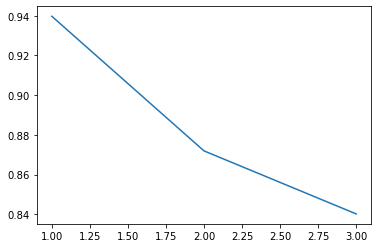

In [24]:
data=[0.035719,0.031417,0.030872,0.029147]
df=pd.DataFrame({'Annualized':data})
df['Percent_Change']=df['Annualized'].pct_change().fillna(0)

amount=1

returns_plus_one=df['Percent_Change']+1
cumulative_return = returns_plus_one.cumprod()

df['Cumulative']=cumulative_return.mul(amount)

df['2item']=df['Cumulative'].rolling(window=2).mean().plot()

print(df)

In [25]:
(0.035719+0.031417+0.030872+0.029147)/4

0.03178875

In [26]:
print("FLEX is the special case in the problem")
txt="""Player,Position,Score
Darrel Williams,RB,24.9
Mark Ingram,RB,18.8
Michael Carter,RB,16.2
Najee Harris,RB,15.3
Buffalo Bills,DEF,12
Davante Adams,WR,11.3
Aaron Rodgers,QB,10.48
Tyler Bass,K,9
Corey Davis,WR,8.8
T.J. Hockenson,TE,0"""

df = pd.read_csv(io.StringIO(txt),sep=',')
requirements_dictionary = {'QB': 1, 'RB': 2, 'WR': 2, 'TE': 1, 'K': 1, 'DEF': 1, 'FLEX': 2}
#print(df)
df_top_rows = pd.DataFrame()
for position in requirements_dictionary.keys():
    df_top_rows = df_top_rows.append(df[df['Position'] == position].sort_values(by='Score', ascending=False)
                                     .head(requirements_dictionary[position]))
#print(df_top_rows)


position='FLEX'
df_flex_rows = df_top_rows.append(df[df['Position'].isin(['RB','WR','TE'])].sort_values(by='Score', ascending=False).head(requirements_dictionary[position]))

#print(df_flex_rows)
df_result=pd.concat([df_top_rows,df_flex_rows],axis=0)
df_result.drop_duplicates(inplace=True)
print(df_result)

            Player Position  Score
6    Aaron Rodgers       QB  10.48
0  Darrel Williams       RB  24.90
1      Mark Ingram       RB  18.80
5    Davante Adams       WR  11.30
8      Corey Davis       WR   8.80
9   T.J. Hockenson       TE   0.00
7       Tyler Bass        K   9.00
4    Buffalo Bills      DEF  12.00


In [27]:
txt="""
column_1
1,2,3
2,3,4
"""
df=pd.read_csv(io.StringIO(txt),sep='\n')
df[['column_2','column_3','column_4']]=df['column_1'].str.split(',',expand=True)
print(df)

  column_1 column_2 column_3 column_4
0    1,2,3        1        2        3
1    2,3,4        2        3        4


C:\Users\DNISHI~1\AppData\Local\Temp/ipykernel_7436/1480007244.py:40: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(xy=[x2,y2],s=value)


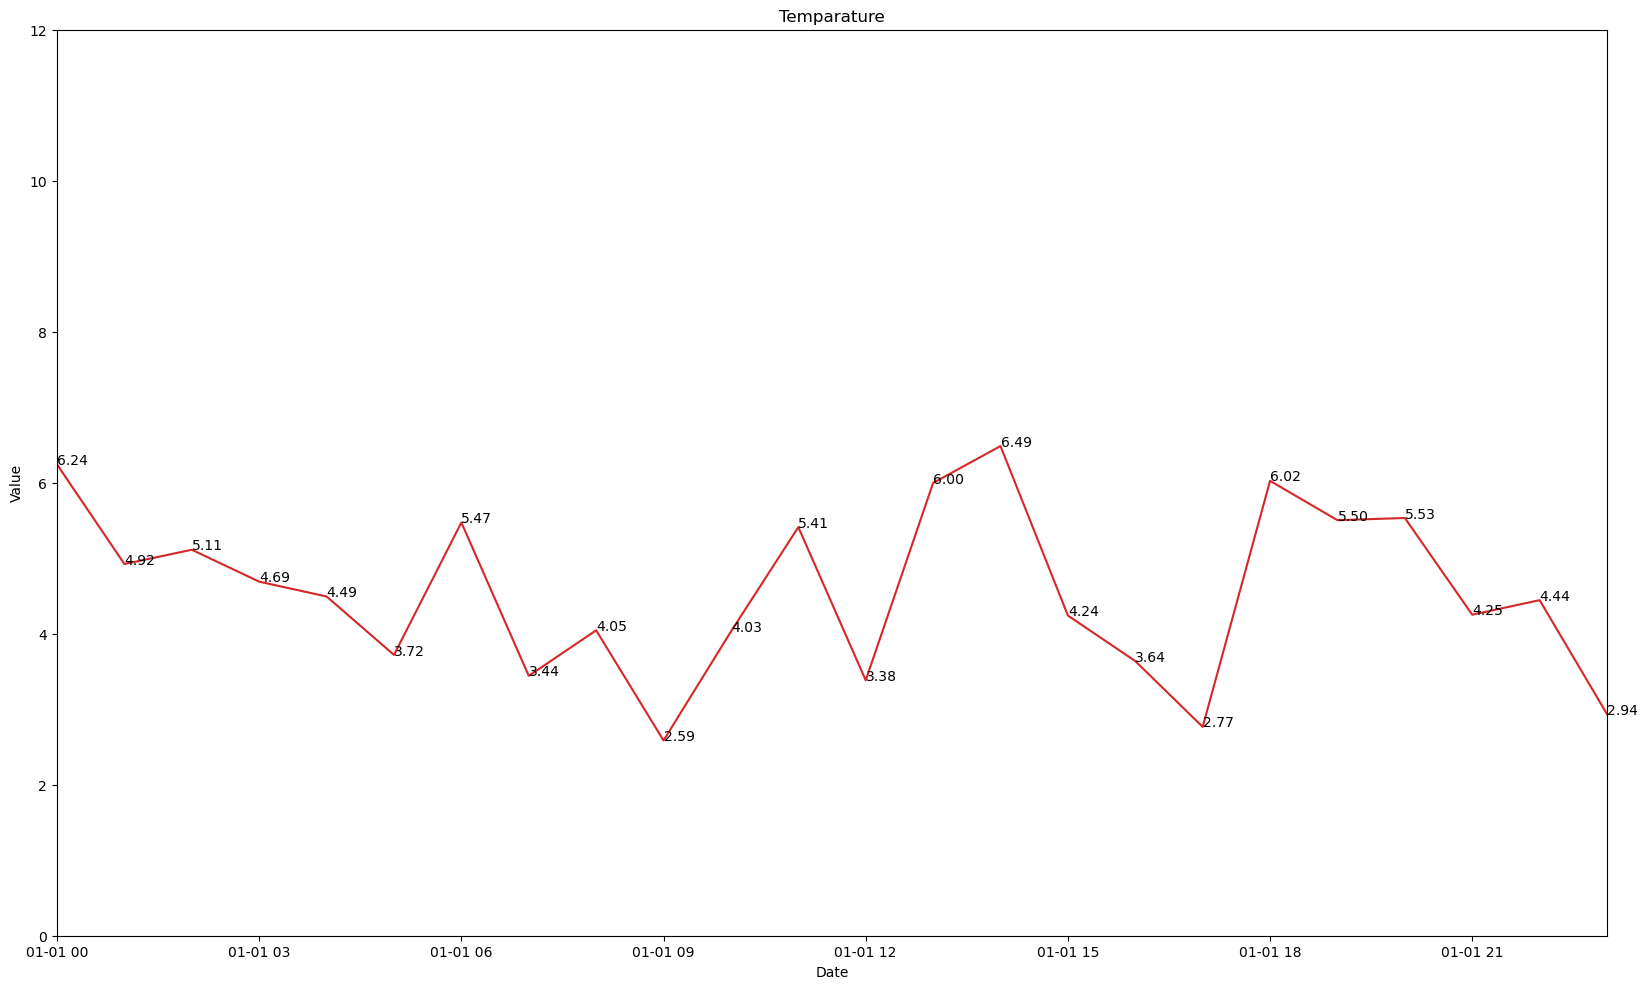

24


In [28]:
data="""Date,Ta
2020-01-01 00:00:00,6.242405
2020-01-01 01:00:00,4.923052
2020-01-01 02:00:00,5.112286
2020-01-01 03:00:00,4.689673
2020-01-01 04:00:00,4.493104
2020-01-01 05:00:00,3.719512
2020-01-01 06:00:00,5.473153
2020-01-01 07:00:00,3.442055
2020-01-01 08:00:00,4.045178
2020-01-01 09:00:00,2.585951
2020-01-01 10:00:00,4.028845
2020-01-01 11:00:00,5.411510
2020-01-01 12:00:00,3.383155
2020-01-01 13:00:00,5.997180
2020-01-01 14:00:00,6.485442
2020-01-01 15:00:00,4.240901
2020-01-01 16:00:00,3.637405
2020-01-01 17:00:00,2.766216
2020-01-01 18:00:00,6.024569
2020-01-01 19:00:00,5.503587
2020-01-01 20:00:00,5.532941
2020-01-01 21:00:00,4.251602
2020-01-01 22:00:00,4.444596
2020-01-01 23:00:00,2.935362
"""
#df['Ta'].plot(figsize=(20,12),legend=True,subplots=True,ylim=(0,12),
#              xticks=list(df.index.values),fontsize=10,grid=True,
#              rot=0, xlim=(pd.Timestamp('2020-01-01 00:00:00'),pd.Timestamp('2020-01-01 23:00:00')))

def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    fig,ax=plt.subplots(figsize=(20,12), dpi=dpi)
    ax.plot(x, y, color='tab:red')
    #plt.xticks(rotation=90)
    items=range(0,len(df))
    for index in items:
        y2=y[index]
        x2=x[index]
        value="{:.2f}".format(y2)
        ax.annotate(xy=[x2,y2],s=value)
        #
        #if index%2==0:
        #    y2=1
        #else:
        #    y2=2
        #ax.annotate(xy=[x2,y2],s=value)
        #ax.annotate(xy=[x2,y2],s=str(y2))
    plt.xlim([pd.Timestamp('2020-01-01 00:00:00'),pd.Timestamp('2020-01-01 23:00:00')])        
    plt.ylim(0,12)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

df = pd.read_csv(StringIO(data), sep=',', index_col=0,parse_dates=['Date'])
plot_df(df, x=df.index, y=df.Ta, title='Temparature')

print(len(df))



In [29]:
df4 = pd.DataFrame({'a':['red','green','yellow','blue'],'b':[1,5,6,7],'c':[1,7,8,9]})
df5 = pd.DataFrame({'a':'red','b':44, 'c':55}, index=[0])

df3 = pd.merge(df4, df5, how='left', on='a')
print(df3)

for key, row in df3.iterrows():
    
    if pd.isna(row['b_y'])==False:
        print(row['b_y'])
        df3.loc[key,'b']=row['b_y']
        df3.loc[key,'c']=row['c_y']
    else:
        print('x')
        df3.loc[key,'b']=row['b_x']
        df3.loc[key,'c']=row['c_x']

df3 = df3.drop(['b_x', 'c_x', 'b_y', 'c_y'], axis=1)
print(df3)

        a  b_x  c_x   b_y   c_y
0     red    1    1  44.0  55.0
1   green    5    7   NaN   NaN
2  yellow    6    8   NaN   NaN
3    blue    7    9   NaN   NaN
44.0
x
x
x
        a     b     c
0     red  44.0  55.0
1   green   5.0   7.0
2  yellow   6.0   8.0
3    blue   7.0   9.0


In [30]:
print("multiple df1 by df2 for every row of df1")

df1="""
Date	ABC	DEF	XYZ
2020-01-31	3	4	2
2020-02-31	1	3	5
2020-03-31	4	2	6
2020-04-31	2	2	7
"""
df2="""
Year	ABC	DEF	XYZ
2020	.5	.4	.3
"""

def create_df(df):
    df=df.strip().split('\n')
    df=list(map(lambda x: x.strip().split('\t'),df))
    df=pd.DataFrame(df[1:],columns=df[0])
    return df

df1=create_df(df1)
df1['ABC']=df1['ABC'].astype(float)
df1['DEF']=df1['DEF'].astype(float)
df1['XYZ']=df1['XYZ'].astype(float)
df2=create_df(df2)
df2['ABC']=df2['ABC'].astype(float)
df2['DEF']=df2['DEF'].astype(float)
df2['XYZ']=df2['XYZ'].astype(float)

cols = ['ABC', 'DEF', 'XYZ']
df3 = df1.copy()
df3[cols]=df1[cols].mul(df2[cols].values)
print(df3)

multiple df1 by df2 for every row of df1
         Date  ABC  DEF  XYZ
0  2020-01-31  1.5  1.6  0.6
1  2020-02-31  0.5  1.2  1.5
2  2020-03-31  2.0  0.8  1.8
3  2020-04-31  1.0  0.8  2.1


In [31]:
print("find all the slot values")
data="""id\tgrp
Alpha-old-1_MOD (Slot01)\t-
Alpha-old-1_PR GRP1\tMOD (Slot07);MOD (Slot08)
Beta-new-1_PR GRP2\tMOD (Slot13);MOD (Slot14)
Beta-old-1_MOD (Slot03)\t-
"""


import re
df=pd.read_csv(io.StringIO(data),sep='\t')

columns=df.columns
for column in columns:
    df[column]=df[column].astype(str)

#pattern=r"[\s\w\(]+(?<=Slot){1}(\d{2})+[\s\w\)]+"
pattern=r"[\s\w\(]+(Slot{1}\d{2})+[\s\w\)]+"

df['output']=''
for key,row in df.iterrows():
    if re.search("PR GRP",str(row['id'])):
        matches=re.findall(pattern,str(row['grp']))
    else:
        matches=re.findall(pattern,str(row['id']))
    if len(matches)>0:
        df.loc[key,'output']=matches

print(df[['id','grp','output']])

find all the slot values
                         id                        grp            output
0  Alpha-old-1_MOD (Slot01)                          -          [Slot01]
1       Alpha-old-1_PR GRP1  MOD (Slot07);MOD (Slot08)  [Slot07, Slot08]
2        Beta-new-1_PR GRP2  MOD (Slot13);MOD (Slot14)  [Slot13, Slot14]
3   Beta-old-1_MOD (Slot03)                          -          [Slot03]


In [32]:
df = pd.DataFrame({"A": ["2021-01-01 05:00:00Acme Industries",
                         "2021-01-01 06:00:00Acme LLC"]})

df.A.str.extract("(\d{4}-\d{2}-\d{2}\s\d{2}:\d{2}:\d{2})?.*")

,0
0,2021-01-01 05:00:00
1,2021-01-01 06:00:00


In [33]:
col_1=['27','>27','27.2','28']
df=pd.DataFrame({'col_1':col_1})

df['sort']=df['col_1'].apply(lambda x: float(re.sub('>','',x))+0.001 if '>' in x else float(x))

print(df)

  col_1    sort
0    27  27.000
1   >27  27.001
2  27.2  27.200
3    28  28.000


In [2]:
print("find the repeating numbers after a decimal")
def repeat(result):    
    pattern=r"\d+\.\d+(\d+)\1"
    matches=re.findall(pattern,result)
    return matches

result=str(1/7)
print(result)
print(repeat(result))
#(\b\d\b)\1
result=str(1/3)
print(repeat(result))
result=str(1/2)
print(result)
print(repeat(result))


find the repeating numbers after a decimal
0.14285714285714285
['714285']
['3']
0.5
[]


In [35]:
txt="""id\tsid\tsteps
A\t1\tstep1
A\t1\tstep1-step2
A\t1\tstep1-step2-step3"""

df=pd.read_csv(io.StringIO(txt),sep='\t')
#print(df)
results=df['steps'].apply(lambda x: x.split('-'))
print(results.tolist())

def Slice2(x):
    print(x)
    if len(x)>=2:
        return x[1]
    return None

def Slice3(x):
    print(x)
    if len(x)>=3:
        return x[2]
    return None


df['page_step1']=results.map(lambda x: x[0])
df['page_step2']=results.map(Slice2)
df['page_step3']=results.map(Slice3)

print(df)


[['step1'], ['step1', 'step2'], ['step1', 'step2', 'step3']]
['step1']
['step1', 'step2']
['step1', 'step2', 'step3']
['step1']
['step1', 'step2']
['step1', 'step2', 'step3']
  id  sid              steps page_step1 page_step2 page_step3
0  A    1              step1      step1       None       None
1  A    1        step1-step2      step1      step2       None
2  A    1  step1-step2-step3      step1      step2      step3


In [9]:
print("melt moves column data and stacks it vertically")
d = {'key': [1,2,3], 'a': [True,True, False], 'b': [False,False,True],'c':['Batchelor','Masters','Doctorate']}
df = pd.DataFrame(d)

print(df)

df2 = df.melt(id_vars=['key'], var_name = 'letter', value_name = 'Boolean')

print(df2)

df2=df2.drop(df2.index[df2['Boolean'] == False])

#df2 = df2.query('Bool == True')
print(df2)

melt moves column data and stacks it vertically
   key      a      b          c
0    1   True  False  Batchelor
1    2   True  False    Masters
2    3  False   True  Doctorate
   key letter    Boolean
0    1      a       True
1    2      a       True
2    3      a      False
3    1      b      False
4    2      b      False
5    3      b       True
6    1      c  Batchelor
7    2      c    Masters
8    3      c  Doctorate
   key letter    Boolean
0    1      a       True
1    2      a       True
5    3      b       True
6    1      c  Batchelor
7    2      c    Masters
8    3      c  Doctorate


In [37]:
print("evaluate a filter criteria and replace the yes or no values for the test column with a value")
df = pd.DataFrame({
            'spid': ['AB01', 'AB02', 'AB03', 'AB04'],
            'value': [15,21,1758,12],
            'target': ['fan','fan','set','lan'],
            'test': ['Yes', 'No', 'No', 'Yes']
    })

mapper = pd.DataFrame({
        'check': ["row['target'] == 'fan'","row['target'] == 'set'"],
        'message' : ['fan err message for [spid]','set err message for [spid]'],
        'to_change' : [('test','Nope'),('test','Save1')]
    })

checks=mapper['check']
to_change_no=mapper['to_change'][0]
to_change_yes=mapper['to_change'][1]

filter=""
for check in checks:
    if filter=="":
        filter="("+check+")"
    else:
        filter+=" | " + "("+check+")"

for key,row in df.iterrows():
    result=eval(filter)
    if (result==True):
        if row['test']=='Yes':
            df.loc[key,'test']=to_change_yes[1]
        elif  row['test']=='No':
            df.loc[key,'test']=to_change_no[1]
        #print(row['test'])
        
print(df)

#print(to_change)
#for key, row in df.iterrows():
#    print(row)

evaluate a filter criteria and replace the yes or no values for the test column with a value
   spid  value target   test
0  AB01     15    fan  Save1
1  AB02     21    fan   Nope
2  AB03   1758    set   Nope
3  AB04     12    lan    Yes


C:\Users\DNISHI~1\AppData\Local\Temp/ipykernel_7436/1652050870.py:1: DeprecationWarning: This function is deprecated. Please call randint(1, 100 + 1) instead
  expeditions1=np.random.random_integers(1, 100, size=500)
C:\Users\DNISHI~1\AppData\Local\Temp/ipykernel_7436/1652050870.py:2: DeprecationWarning: This function is deprecated. Please call randint(1, 1000 + 1) instead
  expeditions2=np.random.random_integers(1, 1000, size=500)
C:\Users\DNISHI~1\AppData\Local\Temp/ipykernel_7436/1652050870.py:11: UserWarning: Legend does not support 'members' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(["members", "hired_staff"],['rouge', 'bleu'])
C:\Users\DNISHI~1\AppData\Local\Temp/ipykernel_7436/1652050870.py:11: UserWarning: Legend does not support 'hired_staff' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.h

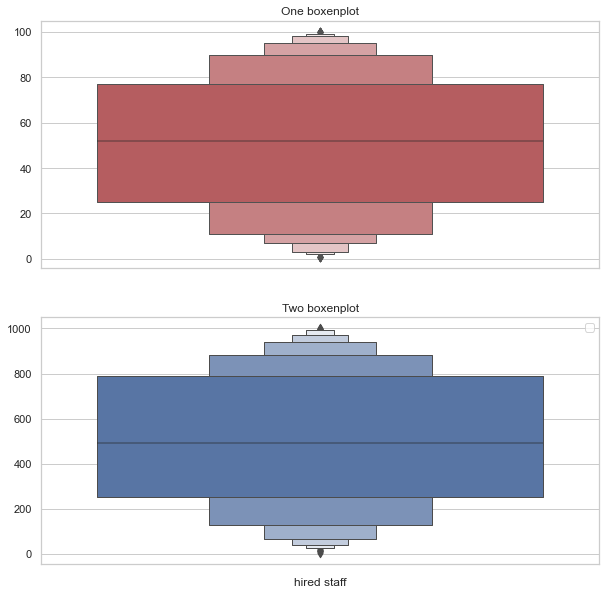

In [38]:
expeditions1=np.random.random_integers(1, 100, size=500)
expeditions2=np.random.random_integers(1, 1000, size=500)
sns.set_theme(style="whitegrid")
fig,ax=plt.subplots(2,figsize=(10,10))
boxenplot_graph = sns.boxenplot(y=expeditions1, color = "r",ax=ax[0])
ax[0].set_title("One boxenplot")
boxenplot_graph2 = sns.boxenplot(y=expeditions2,color = "b",ax=ax[1])
plt.xlabel("hired staff")
ax[1].set_title("Two boxenplot")
#plt.gca().legend(('membres', 'morts'))
plt.legend(["members", "hired_staff"],['rouge', 'bleu'])

In [129]:
print(".+? is the ungreedy character match")
print("(?<=\[\d{2}\]) is the lookbehind character match")
print("(?=\[\d{2}\]) is the lookforward character match")

txt="[01] Final Step - Protonica [02] Liquid Frequencies (Liquid Soul Mix) - Liquid Soul [03] Global Illumination - Liquid Soul [04] Devotion - Liquid Soul [05] Black Rock City - Quantize [06] Plazza Del Trripy - Andromeda [07] Private Guide - Suntree [08] Stereo Gun - Vibrasphere [09] The Cycle - Ritree [10] Atmonizer - Andromed"
#pattern=r"(?<=\[\d{2}\])\[.\d{2}\]+?"
#pattern=r"(?<=\[\d{2}\]).+?"
pattern="\[\d{2}\].+?(?=\[\d{2}\]|$)"
matches=re.findall(pattern,txt)
#matches=re.split(r'(?!^)(?=\[\d{2}])', txt)
for match in matches:
    print("output",match)

.+? is the ungreedy character match
(?<=\[\d{2}\]) is the lookbehind character match
(?=\[\d{2}\]) is the lookforward character match
output [01] Final Step - Protonica 
output [02] Liquid Frequencies (Liquid Soul Mix) - Liquid Soul 
output [03] Global Illumination - Liquid Soul 
output [04] Devotion - Liquid Soul 
output [05] Black Rock City - Quantize 
output [06] Plazza Del Trripy - Andromeda 
output [07] Private Guide - Suntree 
output [08] Stereo Gun - Vibrasphere 
output [09] The Cycle - Ritree 
output [10] Atmonizer - Andromed


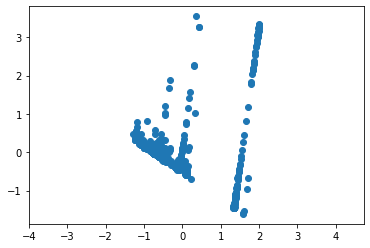

the pca correlation  6.938893903907228e-18


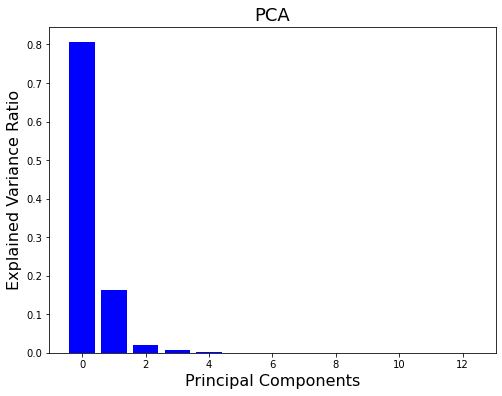

In [5]:
#https://nowosad.github.io/spData/reference/boston.html
df=pd.read_csv('https://raw.githubusercontent.com/eric-bunch/boston_housing/master/boston.csv')


y = df['MDEV'].astype(float)*1000

X = df.drop(["MDEV"], axis = 1)
X_dummies = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.30, random_state=0)
n_components = 13
pipeline = Pipeline([("imputer", SimpleImputer(strategy='most_frequent')), ('scaling', StandardScaler()),('pca', PCA(n_components=n_components,whiten=True)), ('regr',LinearRegression())])
pipeline.fit(X_train, y_train)

pca = pipeline.named_steps['pca']

pca.fit(X)
pca_features=pca.transform(X)

xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

correlation, pvalue = pearsonr(xs,ys)

print("the pca correlation ",correlation)


fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.bar(range(pca.n_components), pca.explained_variance_ratio_, linewidth=2, color='blue')
ax.set_ylabel("Explained Variance Ratio", fontsize=16)
ax.set_xlabel("Principal Components", fontsize=16)
ax.set_title("PCA", fontsize=18)

#print(pca.components_)

reduced = pca.fit_transform(df[X.columns])        





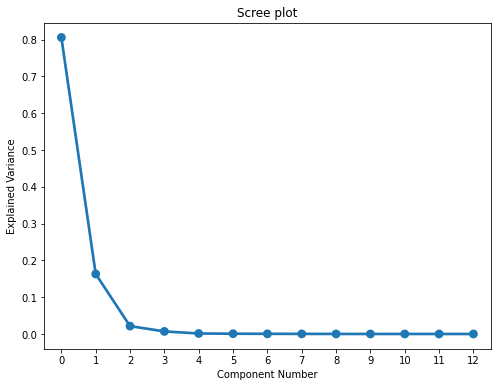

C:\Users\dnishimoto\Anaconda3\envs\deeplearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dnishimoto\Anaconda3\envs\deeplearning\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


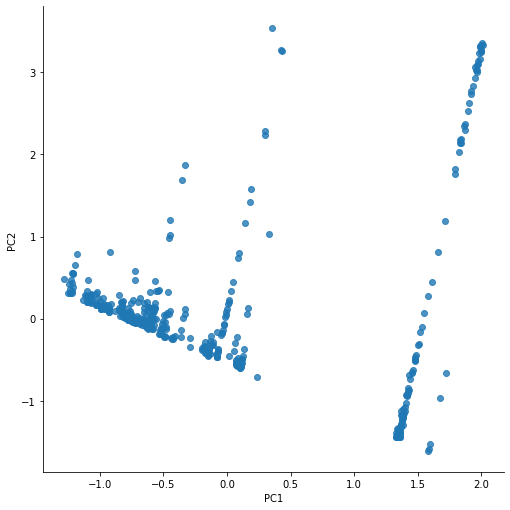

In [6]:
for i in range(0, n_components):
    df['PC' + str(i + 1)] = reduced[:, i]

# Do a scree plot
ind = np.arange(0, n_components)
(fig, ax) = plt.subplots(figsize=(8, 6))
sns.pointplot(x=ind, y=pca.explained_variance_ratio_)
ax.set_title('Scree plot')
ax.set_xticks(ind)
ax.set_xticklabels(ind)
ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')
plt.show()

        
    
# Show the points in terms of the first two PCs
g = sns.lmplot('PC1','PC2',
               data=df,
               fit_reg=False,
               scatter=True,
               size=7)

plt.show()


    
# Generate a correlation circle


In [7]:
def circleOfCorrelations(pc_infos, series):
	plt.Circle((0,0),radius=10, color='g', fill=False)
	circle1=plt.Circle((0,0),radius=1, color='g', fill=False)
	fig = plt.gcf()
	fig.gca().add_artist(circle1)
	for idx in range(len(pc_infos["PC-0"])):
		x = pc_infos["PC-0"][idx]
		y = pc_infos["PC-1"][idx]
		plt.plot([0.0,x],[0.0,y],'k-')
		plt.plot(x, y, 'rx')
		plt.annotate(pc_infos.index[idx], xy=(x,y))
	plt.xlabel("PC-0 (%s%%)" % str(series[0])[:4].lstrip("0."))
	plt.ylabel("PC-1 (%s%%)" % str(series[1])[:4].lstrip("0."))
	plt.xlim((-1,1))
	plt.ylim((-1,1))
	plt.title("Circle of Correlations")
 
def myScatter(df):
	# http://stackoverflow.com/a/23010837/1565438
	axs = pd.tools.plotting.scatter_matrix(df, diagonal='kde')
	for ax in axs[:,0]: # the left boundary
		ax.grid('off', axis='both')
		ax.set_ylabel(ax.get_ylabel(), rotation=0, labelpad=len(ax.get_ylabel())+40)
		ax.set_yticks([])
 
	for ax in axs[-1,:]: # the lower boundary
		ax.grid('off', axis='both')
		ax.set_xlabel(ax.get_xlabel(), rotation=90)
		ax.set_xticks([])
	plt.show()
 
def myPCA(df, title, clusters=None):
    # Normalize data
    df_norm = (df - df.mean()) / df.std()
    #print(df_norm.columns)
    # PCA
    pca = PCA(n_components='mle')
    pca_res = pca.fit_transform(df_norm.values)
    series = pd.Series(pca.explained_variance_ratio_)
    series.plot(kind='bar', title=title)
    plt.show()
    # Circle of correlations
    # http://stackoverflow.com/a/22996786/1565438
    coef = np.transpose(pca.components_)
    cols = ['PC-'+str(x) for x in range(len(series))]
    pc_infos = pd.DataFrame(coef, columns=cols, index=df_norm.columns)
    circleOfCorrelations(pc_infos, series)
    plt.show()
    # Plot PCA
    dat = pd.DataFrame(pca_res, columns=cols)
    if isinstance(clusters, np.ndarray):
        for clust in set(clusters):
            colors = list("bgrcmyk")
            plt.scatter(dat["PC-0"][clusters==clust],dat["PC-1"][clusters==clust],c=colors[clust])
    else:
        plt.scatter(dat["PC-0"],dat["PC-1"])
    plt.xlabel("PC-0 (%s%%)" % str(series[0])[:4].lstrip("0."))
    plt.ylabel("PC-1 (%s%%)" % str(series[1])[:4].lstrip("0."))
    plt.title("PCA")
    plt.show()
    return pc_infos, series

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MDEV', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5',
       'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13'],
      dtype='object')


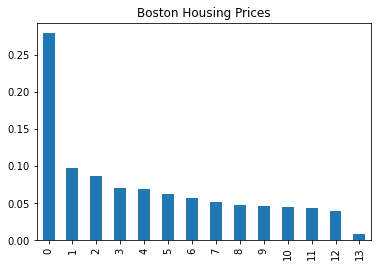

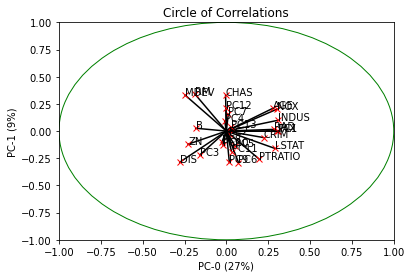

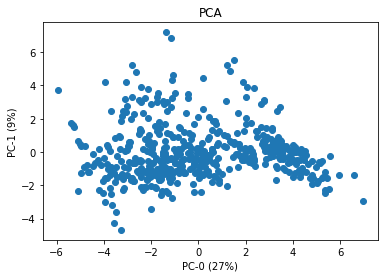

In [8]:
pc_infos, series=myPCA(df,"Boston Housing Prices")
#print(df.columns[0])


In [44]:
previous_df=pd.DataFrame({'StaffName':['Bob','Jim','Don']})
test_list = previous_df["StaffName"].tolist()

sql_string = "("
for i in test_list:
    sql_string = sql_string + "'" + i + "',"
sql_string = sql_string[:-1] + ")"

sql="select * from table where field in{test_list}".format(test_list=sql_string)
print(sql)

select * from table where field in('Bob','Jim','Don')


In [45]:
dict = {'AttributeName': {0: 'John', 1: 'John', 2: 'John', 3: 'John', 4: 'Sally', 5: 'Sally'}, 'Lineage Step': {0: 1, 1: 2, 2: 3, 3: 4, 4:1, 5:2}, 'From Country': {0: 'Spain', 1: 'Scotland', 2: 'England', 3: 'England', 4: 'Scotland', 5:'England'}, 'From Town': {0: 'Madrid', 1: 'Edinburgh', 2: 'London', 3: 'London', 4: 'Edinburgh', 5: 'Manchester'}, 'FromStreet': {0: 'Spanish St', 1: 'Main St', 2: 'Lower St', 3: 'Middle St', 4: 'London St', 5: 'Scotland St'}, 'ToCountry': {0: 'Scotland', 1: 'England', 2: 'England', 3: 'England', 4: 'England', 5: 'England'}, 'ToTown': {0: 'Edinburgh', 1: 'London', 2: 'London', 3: 'London', 4: 'Liverpool', 5: 'London'}, 'ToStreet': {0: 'Lower St', 1: 'Middle St', 2: 'Upper St', 3: 'Upper St', 4: 'new St', 5: 'Old St'}}
df = pd.DataFrame.from_dict(dict)

results=df.query('`From Country` not in ToCountry')
print(results['From Country'].unique())

['Spain']


In [2]:
txt="""[([[1004, 128], [1209, 128], [1209, 200], [1004, 200]],
  'EC~L',
  0.18826377391815186),
 ([[177, 179], [349, 179], [349, 241], [177, 241]], 'OKI', 0.9966741294455473),
 ([[180, 236], [422, 236], [422, 268], [180, 268]],
  'Oki Eleclric Industry Co',
  0.8091106257361781),
 ([[435, 243], [469, 243], [469, 263], [435, 263]], 'Ltd', 0.9978489622393302),
 ([[180, 265], [668, 265], [668, 293], [180, 293]],
  '4-11-22 , Shibaura, Minalo-ku, Tokyo 108-855| Japan',
  0.6109240973537998),
 ([[180, 291], [380, 291], [380, 318], [180, 318]],
  'Tel +81-3-5440-4884',
  0.9406430290171053)]"""

#print(txt)
result=re.subn('[\n\[\]\(\)]','',txt)
print(result)

#pattern=".+?(?=\'.+?\'|$)"
pattern=".+?(?=\'.*\'|$)"

matches=re.findall(pattern,result[0])
#matches=re.split(r'(?!^)(?=\[\d{2}])', txt)
for match in matches:
    print("output",match)

("1004, 128, 1209, 128, 1209, 200, 1004, 200,  'EC~L',  0.18826377391815186, 177, 179, 349, 179, 349, 241, 177, 241, 'OKI', 0.9966741294455473, 180, 236, 422, 236, 422, 268, 180, 268,  'Oki Eleclric Industry Co',  0.8091106257361781, 435, 243, 469, 243, 469, 263, 435, 263, 'Ltd', 0.9978489622393302, 180, 265, 668, 265, 668, 293, 180, 293,  '4-11-22 , Shibaura, Minalo-ku, Tokyo 108-855| Japan',  0.6109240973537998, 180, 291, 380, 291, 380, 318, 180, 318,  'Tel +81-3-5440-4884',  0.9406430290171053", 87)
output 1004, 128, 1209, 128, 1209, 200, 1004, 200,  
output 'EC~L
output ',  0.18826377391815186, 177, 179, 349, 179, 349, 241, 177, 241, 
output 'OKI
output ', 0.9966741294455473, 180, 236, 422, 236, 422, 268, 180, 268,  
output 'Oki Eleclric Industry Co
output ',  0.8091106257361781, 435, 243, 469, 243, 469, 263, 435, 263, 
output 'Ltd
output ', 0.9978489622393302, 180, 265, 668, 265, 668, 293, 180, 293,  
output '4-11-22 , Shibaura, Minalo-ku, Tokyo 108-855| Japan
output ',  0.6109240

In [13]:
from datetime import date
dates=pd.date_range(start='1/1/2019', end=date.today())
df=pd.DataFrame({'Date':dates})
df['Date']=pd.to_datetime(df['Date'])
df['Week']=df['Date'].apply(lambda x: x.isocalendar()[1])
print(df)

           Date  Week
0    2019-01-01     1
1    2019-01-02     1
2    2019-01-03     1
3    2019-01-04     1
4    2019-01-05     1
...         ...   ...
1062 2021-11-28    47
1063 2021-11-29    48
1064 2021-11-30    48
1065 2021-12-01    48
1066 2021-12-02    48

[1067 rows x 2 columns]


In [22]:
data1="""Index  K   A   B
0  K0  A0  B0
1  K0  A1  B1
2  K1  A2  B2
3  K2  A3  B3"""

data2="""K   C   D
0  K0  C0  D0
1  K0  C1  D1
2  K0  C2  D2
3  K2  C3  D3"""

data1 = pd.read_table(StringIO(data1), sep='\s+')
data1 = data1.rename(columns={'K':'K1'})

data2 = pd.read_table(StringIO(data2), sep='\s+')
data2 = data2.rename(columns={'K':'K2'})
data  = pd.concat([data1, data2], axis=1)


#print(data1,data2)
data = data.drop(data[data.K1 != data.K2].index, axis=0)
data.drop('K2',axis=1,inplace=True)
print(data)

   Index  K1   A   B   C   D
0      0  K0  A0  B0  C0  D0
1      1  K0  A1  B1  C1  D1
3      3  K2  A3  B3  C3  D3


In [11]:
df = pd.DataFrame([[1, 2], [4, 5], [7, 8]],
     index=['cobra', 'viper', 'sidewinder'],
     columns=['max_speed', 'shield'])
print(df.loc[df.index > 'cobra'])

            max_speed  shield
viper               4       5
sidewinder          7       8


In [45]:
data1="""HostName	Date
A	2021-01-01 12:30
B	2021-01-01 12:42
B	2021-02-01 12:30
A	2021-02-01 12:40
A	2021-02-25 12:40
A	2021-03-01 12:41
A	2021-03-01 12:42"""
    
df = pd.read_table(StringIO(data1), sep='\t')    
df['Date']=pd.to_datetime(df['Date'])

grouped=df.groupby('HostName')['Date']

def previous_date(group):
    return group.sort_values().shift(1)

df['Previous Date']=grouped.apply(previous_date)

df['Previous Count']=df.apply(lambda x: (x['Date']-x['Previous Date']).days,axis=1)

#(df['Month Before'] <= df['prev_value']) |
df['Con'] = np.where( (df['Previous Date'].notnull() & df['Previous Count']>0) , 1, 0)

print(df.sort_values(by=["HostName","Date"]))




  HostName                Date       Previous Date  Previous Count  Con
0        A 2021-01-01 12:30:00                 NaT             NaN    0
3        A 2021-02-01 12:40:00 2021-01-01 12:30:00            31.0    1
4        A 2021-02-25 12:40:00 2021-02-01 12:40:00            24.0    1
5        A 2021-03-01 12:41:00 2021-02-25 12:40:00             4.0    1
6        A 2021-03-01 12:42:00 2021-03-01 12:41:00             0.0    0
1        B 2021-01-01 12:42:00                 NaT             NaN    0
2        B 2021-02-01 12:30:00 2021-01-01 12:42:00            30.0    1


In [42]:
txt="Donald.Duck and the desired result is DDuck String other strings are Mickey.Mouse and Daffy.Duck"

pattern = re.compile(r'([a-zA-Z]+\.[a-zA-Z]+)')
result=re.findall(pattern,txt)
for item in result:
    #print(item)
    front,back=item.split('.')
    txt=re.sub(item, front[0]+'.'+back,txt)
    #print(txt)
#result = pattern.sub(r'\1', txt)
print(txt)

D.Duck and the desired result is DDuck String other strings are M.Mouse and D.Duck
